# Librararies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# proprocessing
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation 
from keras.layers import LSTM
from keras.models import load_model
import h5py
import datetime

2023-05-26 12:09:27.343199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 12:09:27.739084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 12:09:27.742050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 12:09:32.024300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_df =  pd.read_csv("Datasets/downsample_1_hour.csv", index_col = 0)
data =  data_df.head(100)
data_df.head()

,Summe
Timestamp,
2014-03-12 07:00:00,66.321410
2014-03-12 08:00:00,14.977094
2014-03-12 09:00:00,27.099825
2014-03-12 10:00:00,14.787116
2014-03-12 11:00:00,27.785160


In [44]:
df2 =  pd.read_csv('Datasets/fundamentals.csv')
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [45]:
data_df = data_df[data_df.symbol == 'AAPL']
data_df.drop(['symbol'],1,inplace=True)
data_df.head()

/tmp/ipykernel_51448/1763401402.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df.drop(['symbol'],1,inplace=True)


,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


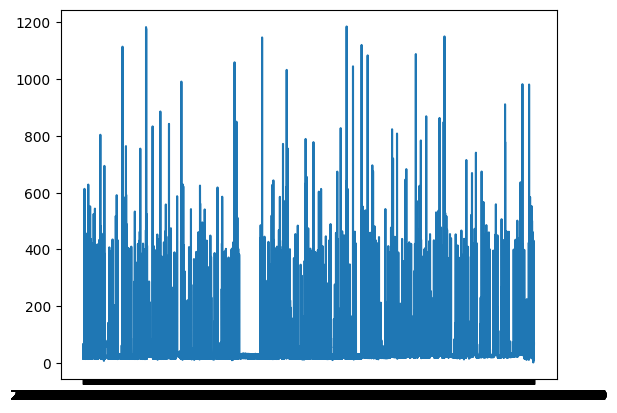

In [4]:
plt.plot(data_df['Summe'])
plt.show()

In [5]:
data_df['date'] = data_df.index
data_df.head()

,Summe,date
Timestamp,,
2014-03-12 07:00:00,66.321410,2014-03-12 07:00:00
2014-03-12 08:00:00,14.977094,2014-03-12 08:00:00
2014-03-12 09:00:00,27.099825,2014-03-12 09:00:00
2014-03-12 10:00:00,14.787116,2014-03-12 10:00:00
2014-03-12 11:00:00,27.785160,2014-03-12 11:00:00


In [6]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df

,Summe,date
Timestamp,,
2014-03-12 07:00:00,66.321410,2014-03-12 07:00:00
2014-03-12 08:00:00,14.977094,2014-03-12 08:00:00
2014-03-12 09:00:00,27.099825,2014-03-12 09:00:00
2014-03-12 10:00:00,14.787116,2014-03-12 10:00:00
2014-03-12 11:00:00,27.785160,2014-03-12 11:00:00
...,...,...
2015-06-29 17:00:00,80.591582,2015-06-29 17:00:00
2015-06-29 18:00:00,52.420814,2015-06-29 18:00:00
2015-06-29 19:00:00,46.189453,2015-06-29 19:00:00


In [7]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['Summe'].values.reshape(-1, 1))

In [8]:
dataset[0:10]

array([[0.05419946],
       [0.010798  ],
       [0.02104537],
       [0.01063741],
       [0.02162469],
       [0.01183238],
       [0.01437957],
       [0.01891699],
       [0.0109943 ],
       [0.02156793]])

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

7973 3418


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    """_summary_

    Args:
        dataset (_type_): _description_
        look_back (int, optional): _description_. Defaults to 15.

    Returns:
        _type_: _description_
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        # print('Value of a : {}'.format(a))
        # print('Value of y : {}'.format(dataset[i + look_back, 0]))
    return np.array(dataX), np.array(dataY)

In [11]:
x_train, y_train = create_dataset(train, look_back=20)
x_test, y_test = create_dataset(test, look_back=20)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7952, 20)
(7952,)
(3397, 20)
(3397,)


The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, this data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7952, 1, 20)
(7952,)
(3397, 1, 20)
(3397,)


# LSTM

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected through layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

Forget Gate: conditionally decides what information to throw away from the block.
Input Gate: conditionally decides which values from the input to update the memory state.
Output Gate: conditionally decides what to output based on input and the memory of the block.
Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

* The network has a visible layer with 1 input, a hidden layer with 20 LSTM blocks or neurons, and an output layer that makes a 15 value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 20 epochs and a batch size of 1 is used.



In [15]:
look_back = 20 
model = Sequential()

model.add(LSTM(20,input_shape=(1 ,look_back )))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=3 , batch_size=1,verbose=2)

2023-05-26 12:16:46.329669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 12:16:46.335610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 12:16:46.340073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/3


2023-05-26 12:16:47.541294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 12:16:47.547146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 12:16:47.552044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7952/7952 - 43s - loss: 0.0077 - 43s/epoch - 5ms/step
Epoch 2/3
7952/7952 - 37s - loss: 0.0074 - 37s/epoch - 5ms/step
Epoch 3/3
7952/7952 - 37s - loss: 0.0074 - 37s/epoch - 5ms/step


In [16]:
import math
from sklearn.metrics import mean_squared_error

In [17]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2023-05-26 12:18:46.178909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 12:18:46.188946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 12:18:46.194777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

107/107 [==============================] - 1s 7ms/step
Train Score: 100.63 RMSE
Test Score: 98.14 RMSE


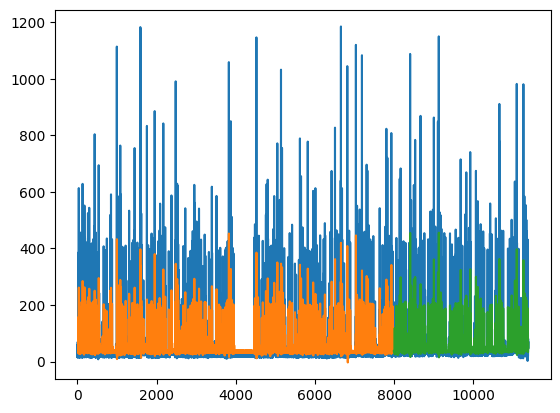

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()